El proyecto consiste en el análisis de un conjunto de datos que contiene información sobre transacciones financieras, incluyendo detalles sobre los clientes, los comerciantes, y la ubicación de las transacciones. Este conjunto de datos, que consta de 1,296,675 entradas, se ha recopilado con el fin de identificar patrones de comportamiento en las transacciones y detectar posibles fraudes.

Análisis Realizado
El análisis se centró en la identificación de tendencias en las transacciones, así como en la detección de posibles fraudes. Se examinó la relación entre las características de los clientes (como género, edad ) y la probabilidad de que una transacción sea fraudulenta. También se exploraron las categorías de comercio más frecuentes y se analizaron las transacciones por ubicación geográfica.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('credit_card_transactions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [15]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [68]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,year,month,day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,unknow,2019,1,1


In [10]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
merch_zipcode            0
dtype: int64

In [11]:
df['merch_zipcode']=df['merch_zipcode'].fillna('unknow')

<Axes: xlabel='gender'>

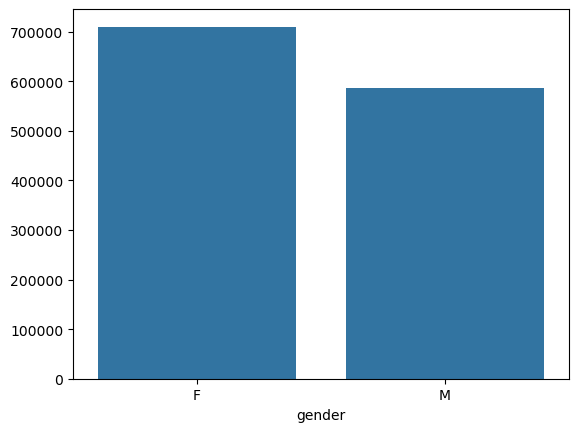

In [66]:
df_gend=df['gender'].value_counts()
sns.barplot(x=df_gend.index,y=df_gend.values)
plt.title('Total Personas por Genero')
plt.xlabel('Total Personas')
plt.ylabel('Gender')
plt.show()

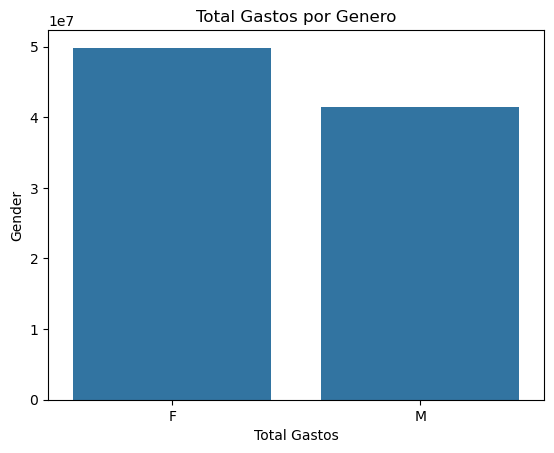

In [67]:
df_gender=df.groupby('gender').agg({'amt':'sum'}).reset_index()
sns.barplot(x='gender',y='amt',data=df_gender)
plt.title('Total Gastos por Genero')
plt.xlabel('Total Gastos')
plt.ylabel('Gender')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6684\3859086251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='category',x='amt',data=df_category,palette='viridis')


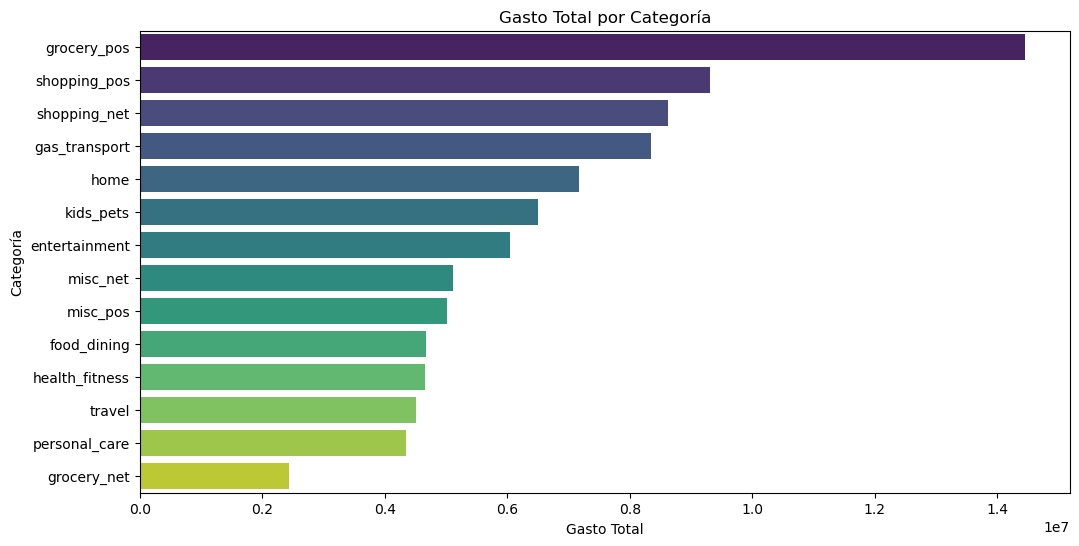

In [50]:
df_category= df.groupby('category').agg({'amt':'sum'}).sort_values(by='amt',ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(y='category',x='amt',data=df_category,palette='viridis')
plt.title('Gasto Total por Categoría')
plt.xlabel('Gasto Total')
plt.ylabel('Categoría')
plt.show()


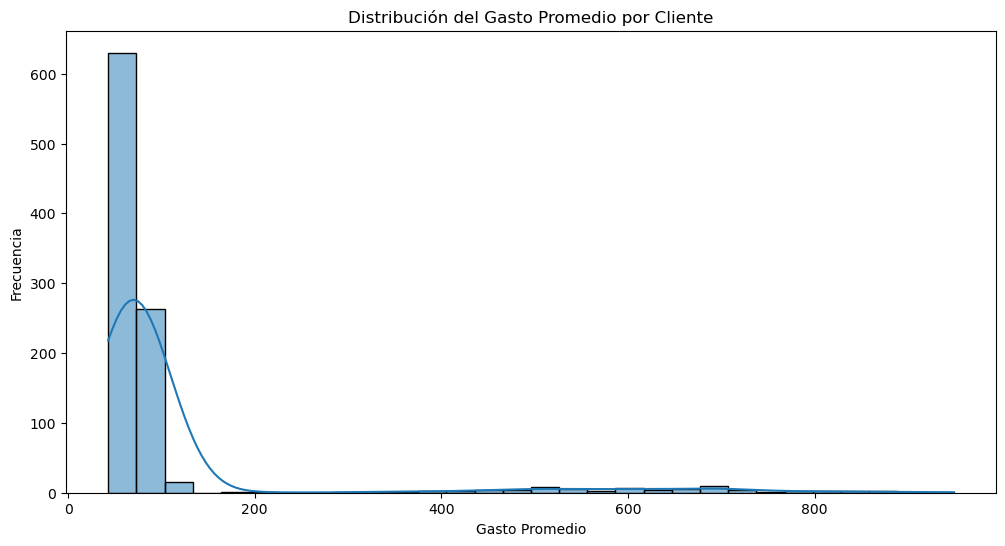

In [53]:
average_spending_per_customer = df.groupby('cc_num')['amt'].mean().reset_index()
average_spending_per_customer.columns = ['cc_num', 'avg_amt']

plt.figure(figsize=(12, 6))
sns.histplot(average_spending_per_customer['avg_amt'], bins=30, kde=True)
plt.title('Distribución del Gasto Promedio por Cliente')
plt.xlabel('Gasto Promedio')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6684\4075674933.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='magma')


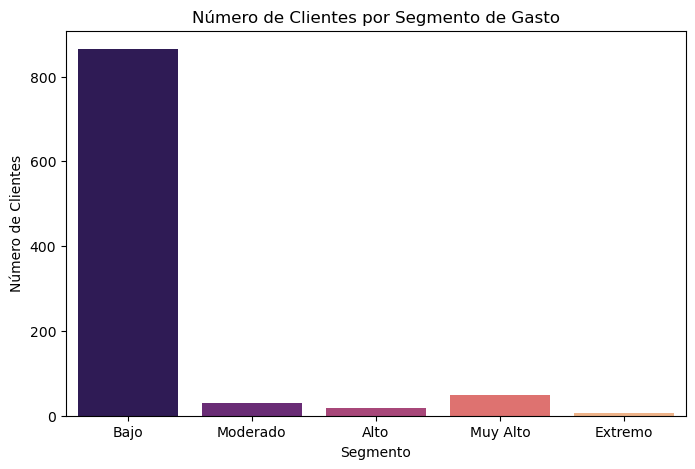

In [57]:
bins = [50, 100, 200, 500, 800, float('inf')]
labels = ['Bajo', 'Moderado', 'Alto', 'Muy Alto', 'Extremo']
average_spending_per_customer['segment'] = pd.cut(average_spending_per_customer['avg_amt'], bins=bins, labels=labels)

segment_counts = average_spending_per_customer['segment'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='magma')
plt.title('Número de Clientes por Segmento de Gasto')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.show()

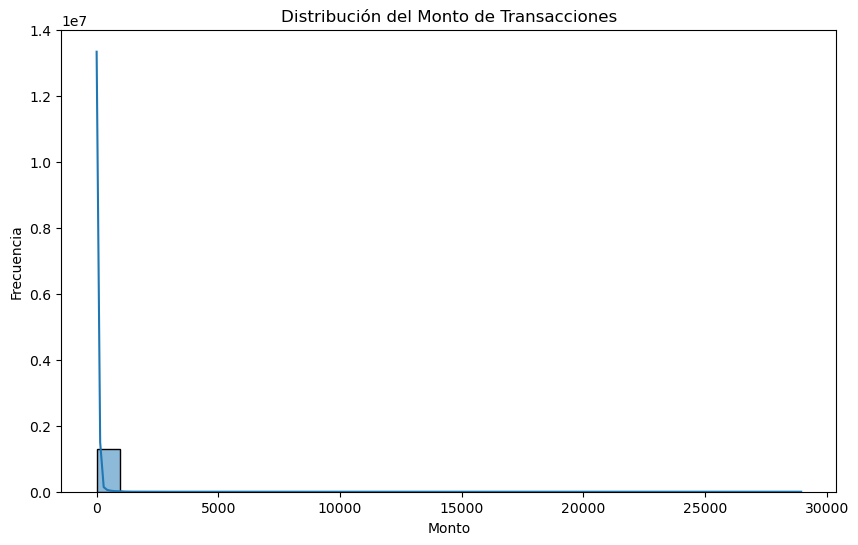

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=30, kde=True)
plt.title('Distribución del Monto de Transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

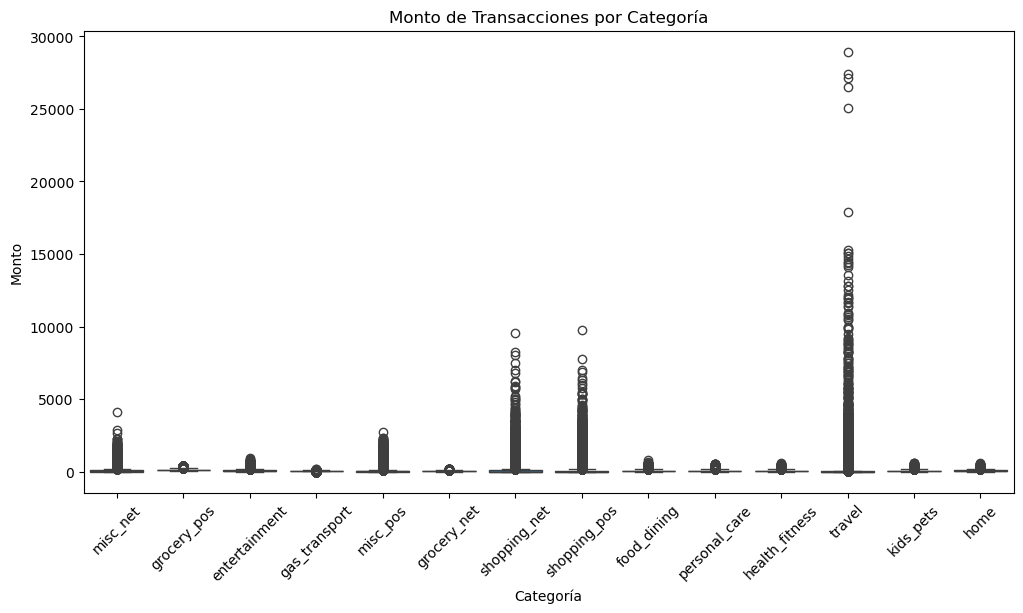

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=df)
plt.title('Monto de Transacciones por Categoría')
plt.xticks(rotation=45)
plt.xlabel('Categoría')
plt.ylabel('Monto')
plt.show()

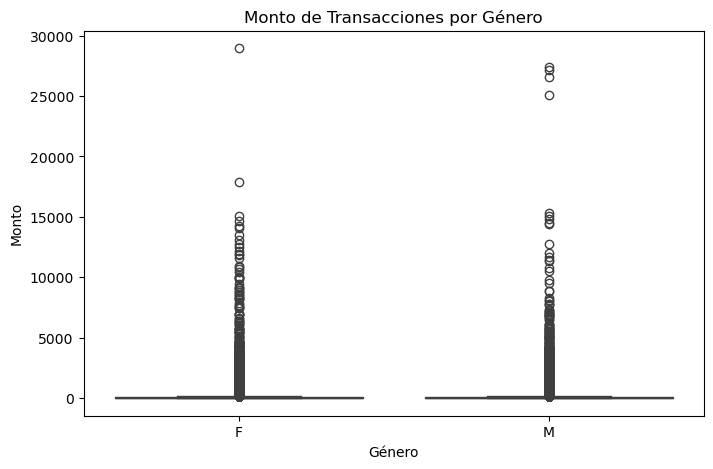

In [75]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='amt', data=df)
plt.title('Monto de Transacciones por Género')
plt.xlabel('Género')
plt.ylabel('Monto')
plt.show()

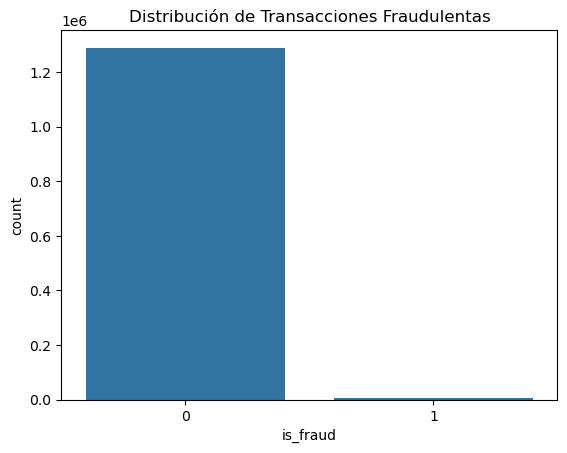

In [52]:
sns.countplot(x='is_fraud', data=df)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

In [38]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day


In [62]:
features = ['year', 'month', 'day', 'city_pop', 'gender', 'category']
X = pd.get_dummies(df[features], drop_first=True) 
y = df['amt']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [64]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 24592.290398762972
R-squared: 0.016879092409020524


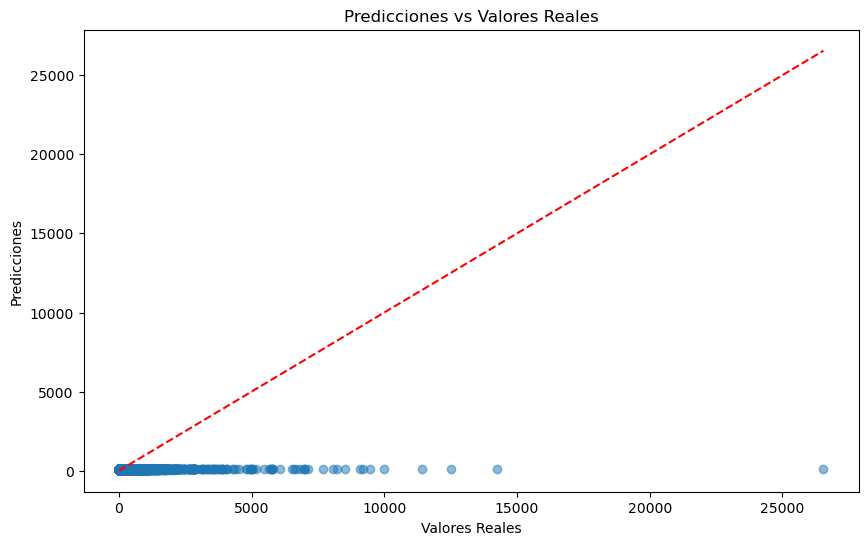

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Conclusiones
Patrones de Gasto: Se identificaron patrones de gasto según la categoría de productos, con algunas categorías mostrando un mayor riesgo de fraude.

Demografía y Fraude: Los análisis mostraron que ciertos grupos demográficos, en particular aquellos con profesiones específicas, estaban más involucrados en transacciones fraudulentas.

Ubicación Geográfica: Las transacciones realizadas en ciertas áreas geográficas mostraron una mayor tasa de fraude, lo que sugiere la necesidad de una vigilancia más cercana en esas zonas.


Este proyecto proporciona una base sólida para la mejora de las estrategias de detección de fraudes y el desarrollo de políticas más efectivas para proteger tanto a los comerciantes como a los consumidores.